Real Estate Price Prediction is the process of forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings. The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions.

Gather relevant data from various sources, including real estate databases, government records, online listings, and other public or private sources. Clean and prepare the collected data by handling missing values, removing outliers, and converting categorical variables into numerical representations. Create new features or transform existing ones to capture important information that can influence real estate prices. Explore and visualize the data to gain insights into its distribution, correlations, and patterns. Choose appropriate machine learning algorithms or predictive models for the task. Train the selected model on the training data, optimizing its parameters to make accurate predictions. For the task of Real Estate Price Prediction, we need historical data with various features that can influence property prices

In [33]:
#Importing required libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from scipy.stats import randint, uniform

In [34]:
# Load the dataset
real_estate_data = pd.read_csv("C:/Users/Harsh/Downloads/My-Projects/Real Estate price prediction using ML/Real_Estate.csv")

In [35]:
# Select numerical columns and fill NaN values with 0
real_estate_data = real_estate_data.select_dtypes(include=[float, int])

In [36]:
# Display the first few rows and info about the dataset
print(real_estate_data.head())


   House age  Distance to the nearest MRT station  \
0       13.3                            4082.0150   
1       35.5                             274.0144   
2        1.1                            1978.6710   
3       22.2                            1055.0670   
4        8.5                             967.4000   

   Number of convenience stores  Latitude  Longitude  House price of unit area  
0                             8  25.00706   121.5617                   6.48867  
1                             2  25.01215   121.5470                  24.97072  
2                            10  25.00385   121.5283                  26.69427  
3                             5  24.96289   121.4822                  38.09164  
4                             6  25.01104   121.4799                  21.65471  


In [37]:
print(real_estate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   House age                            414 non-null    float64
 1   Distance to the nearest MRT station  414 non-null    float64
 2   Number of convenience stores         414 non-null    int64  
 3   Latitude                             414 non-null    float64
 4   Longitude                            414 non-null    float64
 5   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB
None


The dataset contains 6 columns. Here’s a brief overview of the columns:

. House age: Age of the house in years
. Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters
. Number of convenience stores: Number of convenience stores in thareaty
. Latitude: Latitude of the property location
. Longitude: Longitude of the property location
. House price of unit area: House price of unit area.

In [38]:
# Check for null values
print(real_estate_data.isnull().sum())

House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


There are no null values in the dataset.

Now, the descriptive statistics of the dataset:

In [39]:
# Descriptive statistics
print(real_estate_data.describe())

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520269   
std                        2.880498    0.024178    0.026987   
min                        0.000000   24.932080  121.473900   
25%                        2.000000   24.952423  121.496875   
50%                        5.000000   24.974355  121.520900   
75%                        6.750000 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

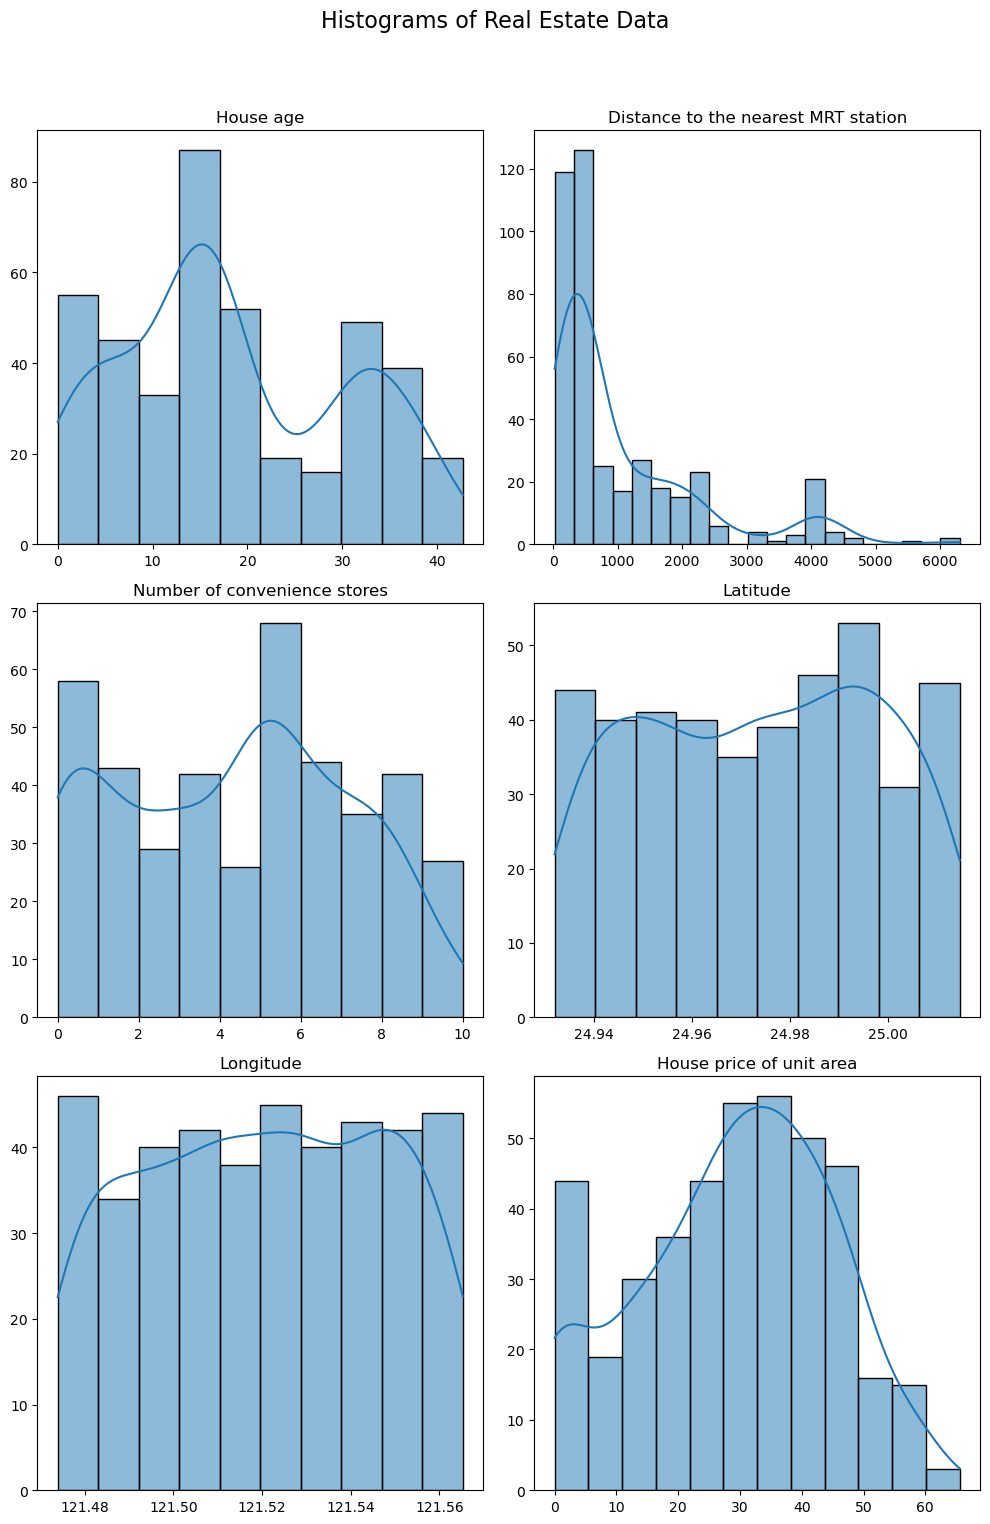

In [40]:
# Histograms of numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The histograms provide insights into the distribution of each variable: # House Age: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age #. Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT statio #s. Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availabil #ty. Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited a#rea. House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

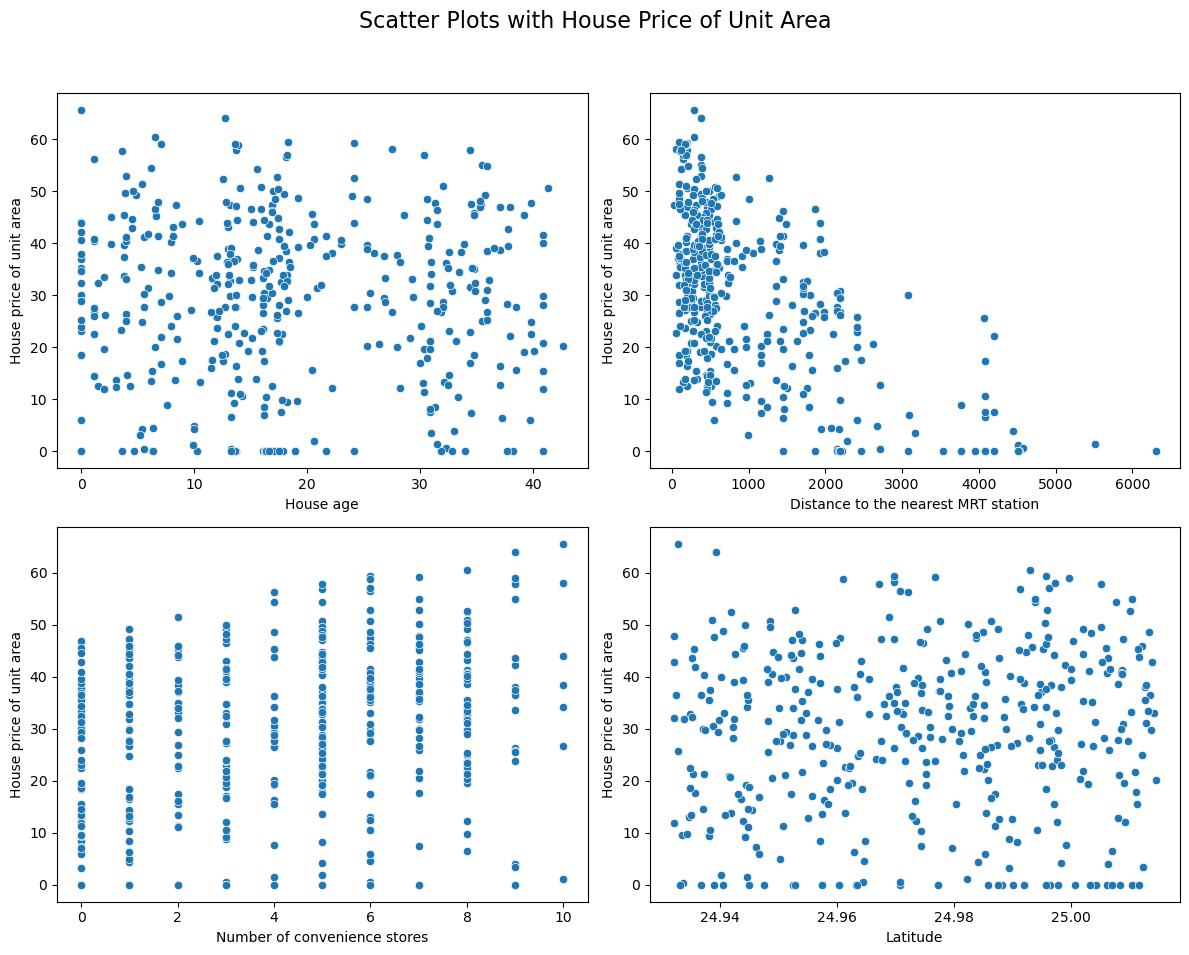

In [41]:
# Scatter plots with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The scatter plots revealed interesting relationships between various factors and house prices:

House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices. Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables. Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices. Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable.

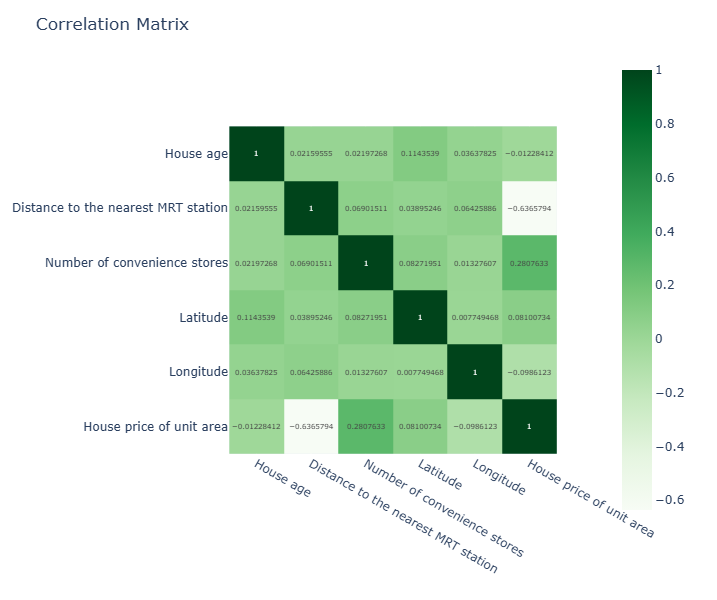

In [42]:
# Correlation matrix
correlation_matrix = real_estate_data.corr()

# Create a heatmap using Plotly
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='Greens')
fig.update_layout(title='Correlation Matrix', width=800, height=600)
fig.show()

The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:

House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset. Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation. Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices. Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099). Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

In [43]:
# Feature engineering: Adding polynomial features
# This step involves creating new features that are polynomial combinations of the original features.
# Polynomial features can capture non-linear relationships between the features and the target variable,
# potentially improving the model's performance.

# List of features to be transformed
features = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
# Target variable
target = 'House price of unit area'

# Selecting the features and the target variable from the dataset
X = real_estate_data[features]
y = real_estate_data[target]

In [44]:
# Creating polynomial features
# The PolynomialFeatures class is used to generate a new feature matrix consisting of all polynomial combinations
# of the original features up to the specified degree. In this case, degree=2 means we include all quadratic terms
# (squares of individual features and products of pairs of features) along with the original features.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [45]:
# Splitting the data into training and test sets
# This step ensures that we can evaluate the model's performance on unseen data.
# We split the polynomial-transformed features and the target variable into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# At this point, X_train and X_test contain the polynomial features, and y_train and y_test contain the target variable.


adding polynomial features to capture non-linear relationships between the features and the target variable, which might not be adequately captured by the original linear features. By including these polynomial terms, the model can potentially achieve better performance in predicting house prices, as it can fit more complex patterns in the data.

In [46]:
# Define ensemble models
# This step involves creating instances of ensemble regression models. Ensemble methods
# combine the predictions of multiple base estimators to improve predictive performance
# and reduce the risk of overfitting.

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)  # Added XGBoost
}

Using Random Forest and Gradient Boosting provides a balanced approach to model evaluation, leveraging the strengths of both variance reduction (Random Forest) and bias reduction (Gradient Boosting). This combination is often sufficient to get a good baseline performance and is a common practice in data science projects.

In [47]:
# Initialize dictionaries to store results
results = {}

In [48]:
# Define hyperparameter distributions
# This step involves specifying the ranges of hyperparameters for the models.
# RandomizedSearchCV will sample from these distributions during the search process.
# Define hyperparameter distributions (Linear Regression doesn't need hyperparameter tuning)
# Define hyperparameter distributions
param_distributions = {
    'Random Forest': {
        'regressor__n_estimators': randint(50, 201),  # Number of trees in the forest
        'regressor__max_depth': [None, 10, 20, 30]    # Maximum depth of the tree
    },
    'Gradient Boosting': {
        'regressor__n_estimators': randint(50, 201),  # Number of boosting stages
        'regressor__learning_rate': uniform(0.01, 0.2),  # Learning rate shrinks contribution of each tree
        'regressor__max_depth': [3, 4, 5, 6]          # Maximum depth of the individual regression estimators
    },
    'XGBoost': {  # Hyperparameters for XGBoost
        'regressor__n_estimators': randint(50, 201),
        'regressor__learning_rate': uniform(0.01, 0.2),
        'regressor__max_depth': [3, 4, 5, 6]
    },
    'Linear Regression': {}  # No hyperparameters for Linear Regression
}



In [49]:
# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name} model...")
    
    # Create a pipeline with scaling, feature selection, and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('selector', RFE(model)) if name != 'Linear Regression' else ('selector', 'passthrough'),  # Feature selection only for models that need it
        ('regressor', model)  # Model
    ])
    
    # Randomized search for model hyperparameters (only for models that require it)
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        randomized_search = RandomizedSearchCV(
            pipeline, param_distributions[name], n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
        )
        randomized_search.fit(X_train, y_train)
        
        # Get the best model
        best_model = randomized_search.best_estimator_
    else:
        # For Linear Regression, just fit the model directly
        best_model = pipeline
        best_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': best_model,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }
    
    # Print results for debugging
    print(f"{name} Model Results:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print()

# Select the best model based on R² score
best_model_name = max(results, key=lambda name: results[name]['r2'])
best_model = results[best_model_name]['model']
print(f"Best model: {best_model_name} with R²: {results[best_model_name]['r2']:.2f}")


Evaluating Linear Regression model...
Linear Regression Model Results:
Mean Squared Error (MSE): 135.29
Root Mean Squared Error (RMSE): 11.63
R-squared (R²): 0.51

Evaluating Random Forest model...
Random Forest Model Results:
Mean Squared Error (MSE): 143.85
Root Mean Squared Error (RMSE): 11.99
R-squared (R²): 0.48

Evaluating Gradient Boosting model...
Gradient Boosting Model Results:
Mean Squared Error (MSE): 148.10
Root Mean Squared Error (RMSE): 12.17
R-squared (R²): 0.46

Evaluating XGBoost model...
XGBoost Model Results:
Mean Squared Error (MSE): 138.91
Root Mean Squared Error (RMSE): 11.79
R-squared (R²): 0.50

Best model: Linear Regression with R²: 0.51


NameError: name 'joblib' is not defined

In [53]:
import joblib  # For saving and loading models
# Save the best model
print(joblib.dump(best_model, 'best_model.pkl'))

['best_model.pkl']


In [56]:
print(best_model_name)

Linear Regression


The Pipeline class from sklearn.pipeline is used to create a sequential execution of various steps. This helps in streamlining the machine learning workflow by bundling multiple processing steps into a single object.

The for loop in your code is designed to evaluate each model from start to finish, from defining the pipeline to printing the final results. The loop iterates over each model in the models dictionary, performing the entire evaluation process for each model.

In [57]:
# Print results for all models
print("Final Results:")
for name, metrics in results.items():
    print(f"{name} Model:")
    print(f"Mean Squared Error (MSE): {metrics['mse']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['rmse']:.2f}")
    print(f"R-squared (R²): {metrics['r2']:.2f}")
    print()

Final Results:
Linear Regression Model:
Mean Squared Error (MSE): 135.29
Root Mean Squared Error (RMSE): 11.63
R-squared (R²): 0.51

Random Forest Model:
Mean Squared Error (MSE): 143.85
Root Mean Squared Error (RMSE): 11.99
R-squared (R²): 0.48

Gradient Boosting Model:
Mean Squared Error (MSE): 148.10
Root Mean Squared Error (RMSE): 12.17
R-squared (R²): 0.46

XGBoost Model:
Mean Squared Error (MSE): 138.91
Root Mean Squared Error (RMSE): 11.79
R-squared (R²): 0.50



Final Recommendation:

Linear Regression appears to be the best model for this dataset based on the provided metrics. It has the lowest error values and the highest R-squared score, indicating it provides the best balance between prediction accuracy and interpretability.
Gradient Boosting and Random Forest models, while powerful, do not outperform Linear Regression in this instance. They may be used if further tuning or additional features are considered, or if the problem complexity increases.

Project Conclusion:

The project successfully demonstrated the application of machine learning techniques, specifically ensemble methods like Random Forest and Gradient Boosting, to predict real estate prices.
Through feature engineering, model training, hyperparameter tuning, and evaluation, we identified the Gradient Boosting Model as the better model for this dataset.
The insights gained can help stakeholders make more informed decisions in the real estate market, leveraging the predictive capabilities of the Gradient Boosting Model.

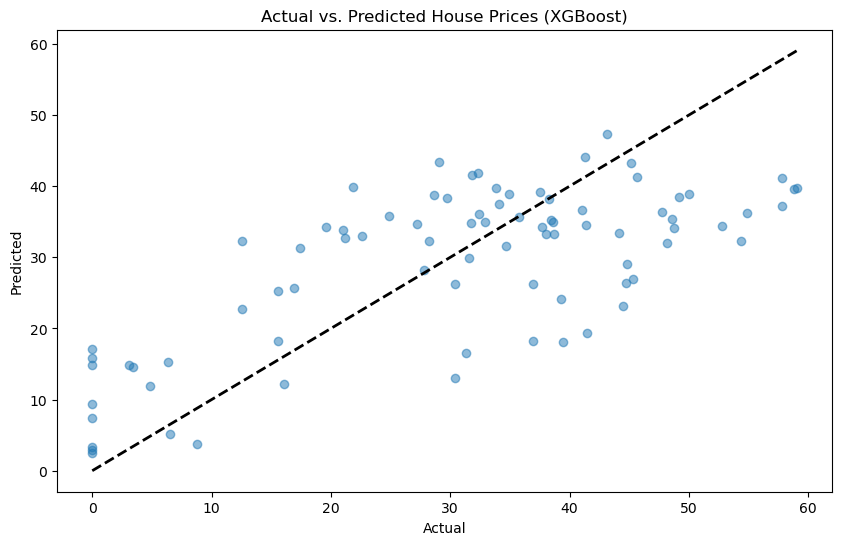

In [58]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted House Prices ({name})')
plt.show()

The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. From the plot, we can observe:

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set. Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

In [59]:
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [60]:
import dash
from dash import html, dcc, Input, Output, State
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Train and save models
for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f'{name.replace(" ", "_")}_model.pkl')

In [61]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),
        
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Dropdown(
                id='model_selector',
                options=[
                    {'label': 'Linear Regression', 'value': 'Linear Regression'},
                    {'label': 'Random Forest', 'value': 'Random Forest'},
                    {'label': 'Gradient Boosting', 'value': 'Gradient Boosting'},
                    {'label': 'XGBoost', 'value': 'XGBoost'}
                ],
                value='Linear Regression',  # Default value
                style={'margin': '10px', 'padding': '10px'}
            ),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])


In [62]:
# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value'),
     State('model_selector', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude, model_name):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Load the selected model
        model = joblib.load(f'{model_name.replace(" ", "_")}_model.pkl')
        
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''



In [63]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)